# Elementary Cellular Automata

[Wolfram Mathworld](https://mathworld.wolfram.com/ElementaryCellularAutomaton.html)

An elementary cellular automaton is a sequence of ones and zeroes that evolves based upon a set of rules. Rules are codified as an 8-bit mask such as 90 (01011010) which is mapped to a static list of potential combinations for each character and its two neighbors.

### Terms

- **Initial State** – Generation zero. For the patterns in this notebook, this state will be begin as a list of zeroes double the size of the number of generations it will run with a single one in the middle. For example, to run 100 generations, the initial state is a concatenation of 100 zeroes, 1 one, and a 100 zeroes.
- **Neighborhood** – The positions considered in when you determine the position in the next generation. For each position, you consider the previous character, the current character, and the following character.
- **Rule Book** – The resulting patterns that can be matched for each character and its two neighbors with the output bit.
- **Next Generation** – The subsequent state of the automaton when evaluated against the rule book.


### Evolution

The rule book is determined by the rule number passed in with each bit in the number defining the outcome of a combination of numbers. For example, rule 90's bits are 01011010, so these are the results of the eight possible combinations:

```
bin(90) = 0 1 0 1 1 0 1 0

111 = 0   110 = 1   101 = 0   100 = 1   011 = 1   010 = 0   001 = 1   000 = 0
```

In each generation every character is considered with its neighbors on either side and evaluated against the above rules. The result is the next generation.

---

`window` produces a tuple of the previous, current, and next character for each position in a state skipping the first and last characters. For example, if called with `taco`, it would produce a sequence of `('t', 'a', 'c')` and `('a', 'c', 'o')`. This is used to generate the neighborhood for each position.

In [1]:
def window(state, length=3):
    for i in range(1, len(state) - length + 2):
        yield tuple(state[i-1:i+length-1])

In [2]:
words = 'taco', 'salad', '01110'

for word in words:
    print(word, list(window(word)))

taco [('t', 'a', 'c'), ('a', 'c', 'o')]
salad [('s', 'a', 'l'), ('a', 'l', 'a'), ('l', 'a', 'd')]
01110 [('0', '1', '1'), ('1', '1', '1'), ('1', '1', '0')]


---

`rule_book` generates a dictionary of rules indexed by possible combination. First it generates all possible rules in order using `product` from `itertools` in the same order used by convention.

In [3]:
from itertools import product

(rules := sorted(product([0, 1], repeat=3), reverse=True))

[(1, 1, 1),
 (1, 1, 0),
 (1, 0, 1),
 (1, 0, 0),
 (0, 1, 1),
 (0, 1, 0),
 (0, 0, 1),
 (0, 0, 0)]

Then, it turns the rule number passed into a bit mask. Below are the bits for 90.

In [4]:
(bits := [int(bit) for bit in f'{90:08b}'])

[0, 1, 0, 1, 1, 0, 1, 0]

Lastly it returns a `dict` constructed by zipping the two. The possible combination being the key and the result of that combination from the bit mask being the value.

In [5]:
{rule: bit for rule, bit in zip(rules, bits)}

{(1, 1, 1): 0,
 (1, 1, 0): 1,
 (1, 0, 1): 0,
 (1, 0, 0): 1,
 (0, 1, 1): 1,
 (0, 1, 0): 0,
 (0, 0, 1): 1,
 (0, 0, 0): 0}

In [6]:
def rule_book(rule):
    bits = [int(bit) for bit in f'{rule:08b}']
    rules = sorted(product([0, 1], repeat=3), reverse=True)
    
    return {rule: bit for rule, bit in zip(rules, bits)}

---

For the given rule, `run` yields each generation up to the provided number of generations. It first assembles the *initial state* and runs for the given number of generations. For each generation, it looks up the rule for each position by using its neighborhood. The result is the next state.

In [7]:
def run(rule, generations):
    rules = rule_book(rule)
    state = [0] * generations + [1] + [0] * generations
    
    for _ in range(generations):
        yield state
        state = [0] + [rules[triplet] for triplet in window(state)] + [0]

---

Using Matplotlib, `draw` generates an image of the automaton for the given rule up to the given number of generations.

In [8]:
import matplotlib.pyplot as plt


def draw(rule, generations=150):
    fig, ax = plt.subplots(figsize=(16, 9))

    ax.set_title(f'Rule {rule}', fontsize=18, fontweight='bold')
    ax.imshow(list(run(rule, generations)), cmap='gnuplot')
    ax.axis(False);

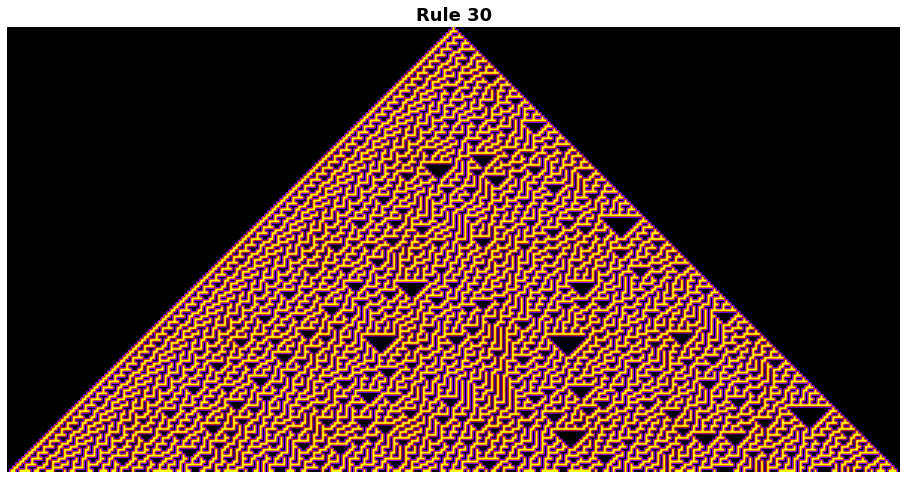

In [9]:
draw(30)

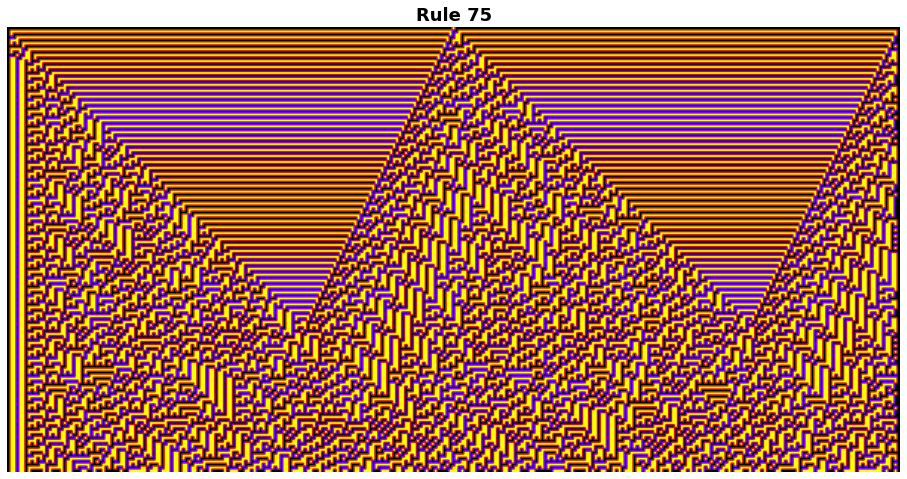

In [10]:
draw(75)

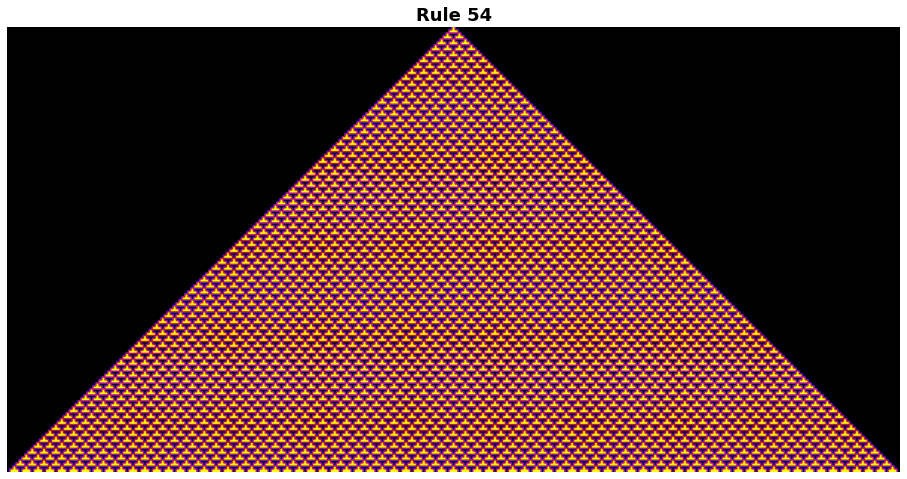

In [11]:
draw(54)

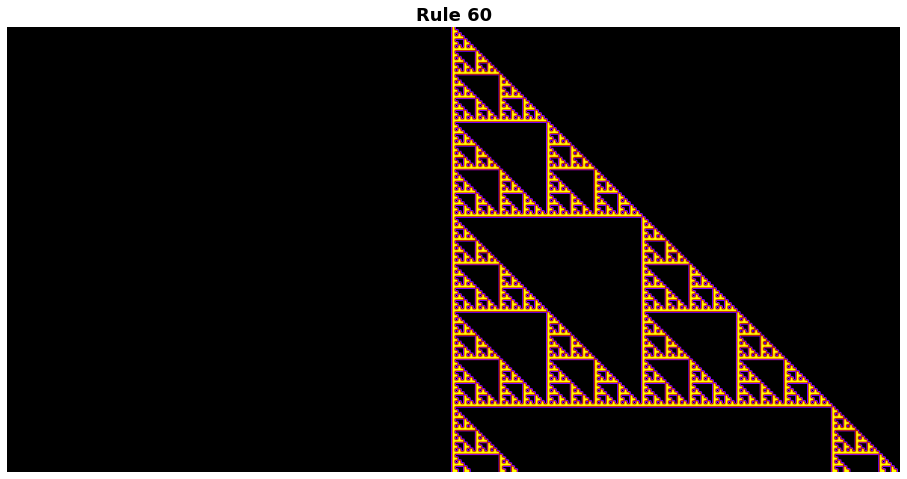

In [12]:
draw(60)

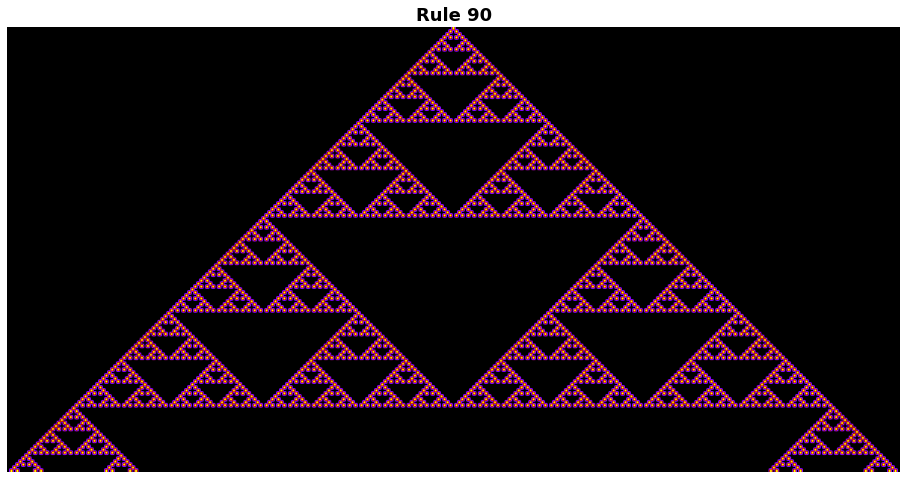

In [13]:
draw(90)

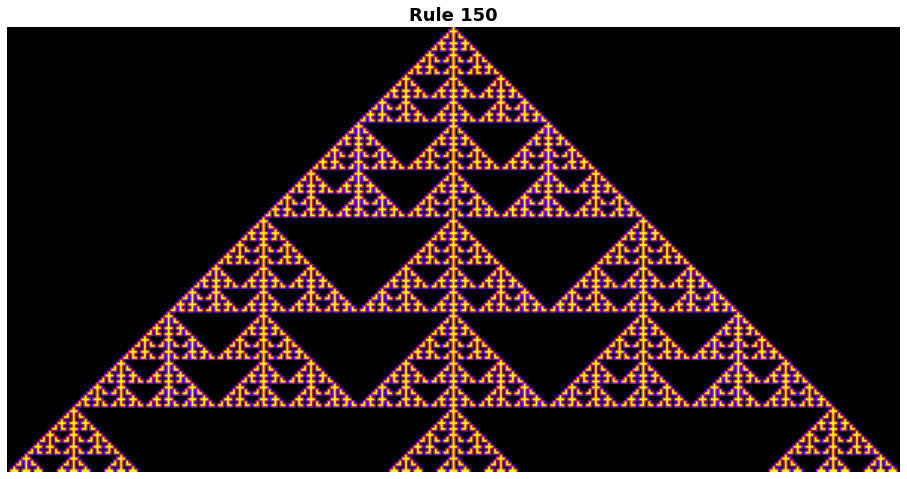

In [14]:
draw(150)

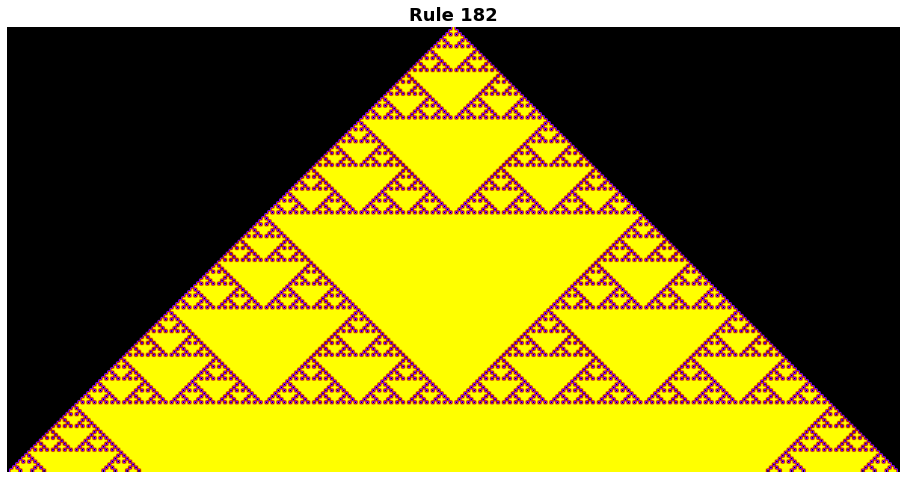

In [15]:
draw(182)

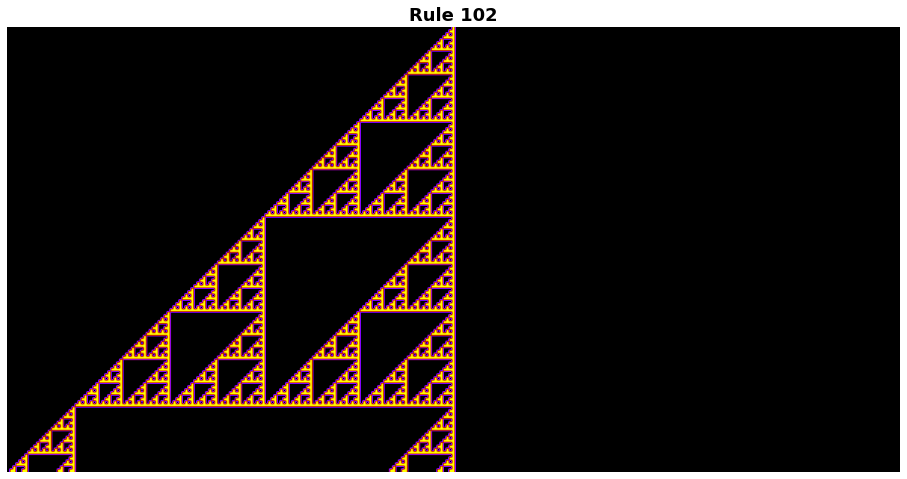

In [16]:
draw(102)

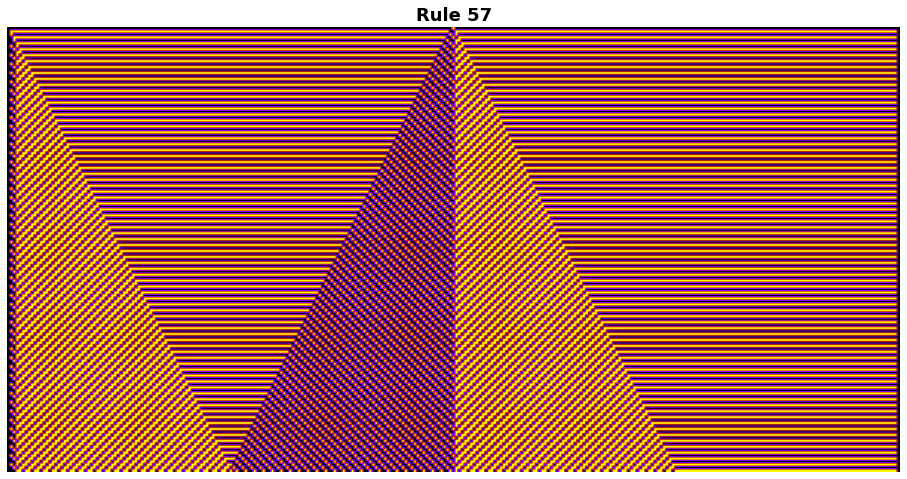

In [17]:
draw(57)